# Feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import seaborn as sns
import time
from itertools import product
from functions import *

In [2]:
base_path = '/Users/leilapaolini/Documents/Data for project 2'
full_path = os.path.join(base_path, 'data_y2.npy')
data = np.load(full_path, allow_pickle=True)

print(f"Data type: {type(data)}")
print(f"Data shape: {data.shape if hasattr(data, 'shape') else 'N/A'}")

Data type: <class 'numpy.ndarray'>
Data shape: (19237044, 37)


In [3]:
df = pd.DataFrame(data, columns=['commune_1', 'commune_2', 'distance', 'year', 'pop_1', 'pop_2',
       'T_Mann', 'T_Frau', 'Etr_Total', 'Accidents dégâts matériels',
       'Accidents avec dommages corporels', 'Morts', 'BFS_NUMMER',
       'GEM_FLAECH', 'EINWOHNERZ', '0-25', '25-65', '65+', 'canton_code',
       'unemployment', 'gdp', 'T_Mann_2', 'T_Frau_2', 'Etr_Total_2',
       'Accidents dégâts matériels_2', 'Accidents avec dommages corporels_2',
       'Morts_2', 'BFS_NUMMER_2', 'GEM_FLAECH_2', 'EINWOHNERZ_2', '0-25_2',
       '25-65_2', '65+_2', 'canton_code_2', 'unemployment_2', 'gdp_2', 'flow'])

df.head()

print(df['BFS_NUMMER'].nunique())

2197


In [4]:
df.shape

(19237044, 37)

In [13]:
def target_correlations(df, target_col='flow'):
    numeric_df = df.select_dtypes(include=[np.number]).copy()
    
    # Log-transform target
    numeric_df['log_flow'] = np.log1p(numeric_df[target_col])
    
    # Drop raw target
    numeric_df = numeric_df.drop(columns=[target_col])
    
    # Spearman correlation
    corr = numeric_df.corr(method='spearman')['log_flow'].drop('log_flow')
    
    # Sort by absolute value but keep sign
    corr = corr.reindex(corr.abs().sort_values(ascending=False).index)
    
    return corr


In [15]:
def plot_all_target_correlations(corr, label_map=None, save_path=None):
    if label_map is not None:
        labels = [label_map.get(feat, feat) for feat in corr.index]
    else:
        labels = corr.index.tolist()

    plt.figure(figsize=(8, max(6, 0.25 * len(corr))))
    plt.barh(labels, corr.values)
    plt.axvline(0, linewidth=1)
    plt.xlabel("Spearman correlation with log(commuting flow)")
    plt.title("Feature correlations with commuting flow")
    plt.gca().invert_yaxis()
    plt.tight_layout()

    if save_path is not None:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches="tight")

    plt.show()
    plt.close()




In [ ]:
def plot_feature_correlation_matrix(df, label_map=None, max_features=25, save_path=None):
    numeric_df = df.select_dtypes(include=[np.number])

    corr = numeric_df.corr(method='spearman')
    corr = corr.iloc[:max_features, :max_features]

    mask = np.triu(np.ones_like(corr, dtype=bool))
    corr_masked = corr.mask(mask)

    plt.figure(figsize=(12, 10))
    plt.imshow(corr_masked, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(label='Spearman correlation')

    labels = [
        label_map.get(col, col) if label_map else col
        for col in corr.columns
    ]

    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.yticks(range(len(labels)), labels)
    plt.title("Spearman correlation matrix (lower triangle)")
    plt.gca().set_aspect('equal', adjustable='box')

    plt.tight_layout()

    if save_path is not None:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()
    plt.close()


In [29]:
drop_feat = ['commune_1', 'commune_2', 'year', 'BFS_NUMMER', 'canton_code', 'BFS_NUMMER_2', 'canton_code_2']
keep_feat = [col for col in df.columns if col not in drop_feat]

drop_feat2 = ['commune_1', 'commune_2', 'year', 'BFS_NUMMER', 'canton_code', 'BFS_NUMMER_2', 'canton_code_2', 'pop_2', 'T_Mann_2', 'T_Frau_2', 'Etr_Total_2',
       'Accidents dégâts matériels_2', 'Accidents avec dommages corporels_2',
       'Morts_2', 'GEM_FLAECH_2', 'EINWOHNERZ_2', '0-25_2',
       '25-65_2', '65+_2', 'unemployment_2', 'gdp_2','flow'] 
keep_feat2 = [col for col in df.columns if col not in drop_feat2]


df_corr = df[keep_feat]
df_corr_matrix = df[keep_feat2]

In [9]:
df_corr.head()

,distance,pop_1,pop_2,T_Mann,T_Frau,Etr_Total,Accidents dégâts matériels,Accidents avec dommages corporels,Morts,GEM_FLAECH,...,Accidents avec dommages corporels_2,Morts_2,GEM_FLAECH_2,EINWOHNERZ_2,0-25_2,25-65_2,65+_2,unemployment_2,gdp_2,flow
0,211075.817922,28.0,4591.0,15.0,13.0,0.0,0.0,0.0,0.0,95.0,...,11.0,0.0,43863.0,4638.0,1014.0,2447.0,1233.0,1475.833333,14501.14771,0.0
1,211075.817922,28.0,4591.0,15.0,13.0,0.0,0.0,0.0,0.0,95.0,...,11.0,0.0,43863.0,4638.0,1014.0,2447.0,1233.0,1475.833333,14501.14771,0.0
2,211075.817922,28.0,4591.0,17.0,15.0,164.5,0.0,0.0,0.0,95.0,...,12.0,1.0,43861.0,4591.0,1004.0,2442.0,1292.0,2142.250000,14627.09554,0.0
3,211075.817922,28.0,4591.0,17.0,15.0,164.5,0.0,0.0,0.0,95.0,...,12.0,1.0,43861.0,4591.0,1004.0,2442.0,1292.0,2142.250000,14627.09554,0.0
4,54686.672720,28.0,928.0,15.0,13.0,0.0,0.0,0.0,0.0,95.0,...,2.0,0.0,1263.0,905.0,218.0,548.0,186.0,10763.750000,80775.78955,0.0


In [10]:
label_map = {
    # Spatial
    'distance': 'Distance (km)',

    # Population (origin)
    'pop_1': 'Population (origin)',
    'GEM_FLAECH': 'Area (origin)',
    'EINWOHNERZ': 'Population density (origin)',

    # Population structure (origin)
    '0-25': 'Population aged 0-25 (origin)',
    '25-65': 'Population aged 25-65 (origin)',
    '65+': 'Population aged 65+ (origin)',
    'T_Mann': 'Male population share (origin)',
    'T_Frau': 'Female population share (origin)',
    'Etr_Total': 'Foreign population share (origin)',

    # Socio-economic (origin)
    'unemployment': 'Unemployment rate (origin)',
    'gdp': 'GDP (origin)',

    # Traffic accidents (origin)
    'Accidents dégâts matériels': 'Traffic accidents (material damage, origin)',
    'Accidents avec dommages corporels': 'Traffic accidents (injuries, origin)',
    'Morts': 'Traffic accident fatalities (origin)',

    # Population (destination)
    'pop_2': 'Population (destination)',
    'GEM_FLAECH_2': 'Area (destination)',
    'EINWOHNERZ_2': 'Population density (destination)',

    # Population structure (destination)
    '0-25_2': 'Population aged 0-25 (destination)',
    '25-65_2': 'Population aged 25-65 (destination)',
    '65+_2': 'Population aged 65+ (destination)',
    'T_Mann_2': 'Male population share (destination)',
    'T_Frau_2': 'Female population share (destination)',
    'Etr_Total_2': 'Foreign population share (destination)',

    # Socio-economic (destination)
    'unemployment_2': 'Unemployment rate (destination)',
    'gdp_2': 'GDP (destination)',

    # Traffic accidents (destination)
    'Accidents dégâts matériels_2': 'Traffic accidents (material damage, destination)',
    'Accidents avec dommages corporels_2': 'Traffic accidents (injuries, destination)',
    'Morts_2': 'Traffic accident fatalities (destination)'
}


In [33]:
label_map2 = {
    # Spatial
    'distance': 'Distance (km)',

    # Population (origin)
    'pop_1': 'Population',
    'GEM_FLAECH': 'Area',
    'EINWOHNERZ': 'Population density',

    # Population structure (origin)
    '0-25': 'Population aged 0-25',
    '25-65': 'Population aged 25-65',
    '65+': 'Population aged 65+',
    'T_Mann': 'Male population share',
    'T_Frau': 'Female population share',
    'Etr_Total': 'Foreign population share',

    # Socio-economic (origin)
    'unemployment': 'Unemployment rate',
    'gdp': 'GDP',

    # Traffic accidents (origin)
    'Accidents dégâts matériels': 'Traffic accidents (material damage)',
    'Accidents avec dommages corporels': 'Traffic accidents (injuries)',
    'Morts': 'Traffic accident fatalities',
}

In [19]:
corr = target_correlations(df_corr, target_col='flow')

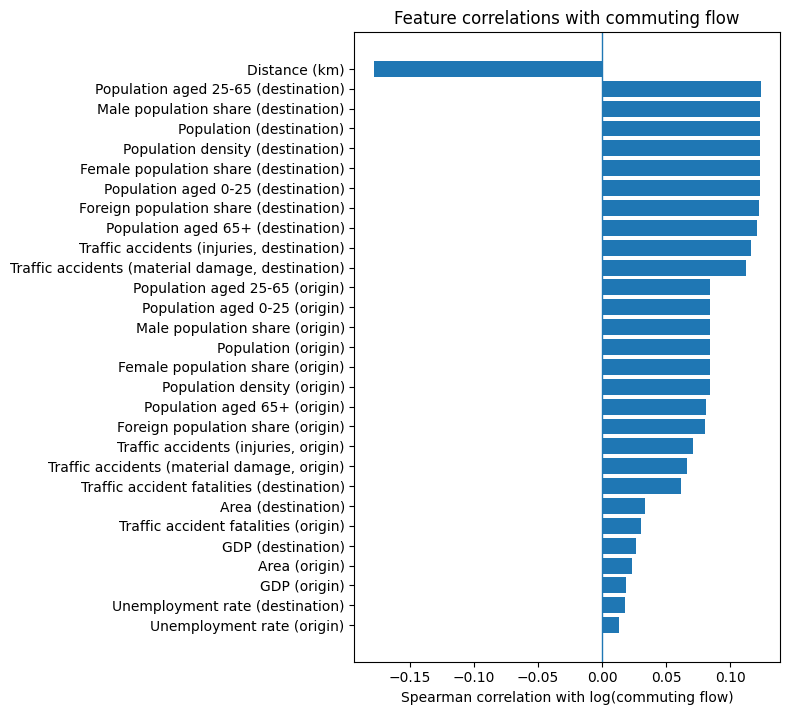

In [25]:
plot_all_target_correlations(
    corr,
    label_map=label_map,
    save_path="figures/feature_target_correlations.png"
)

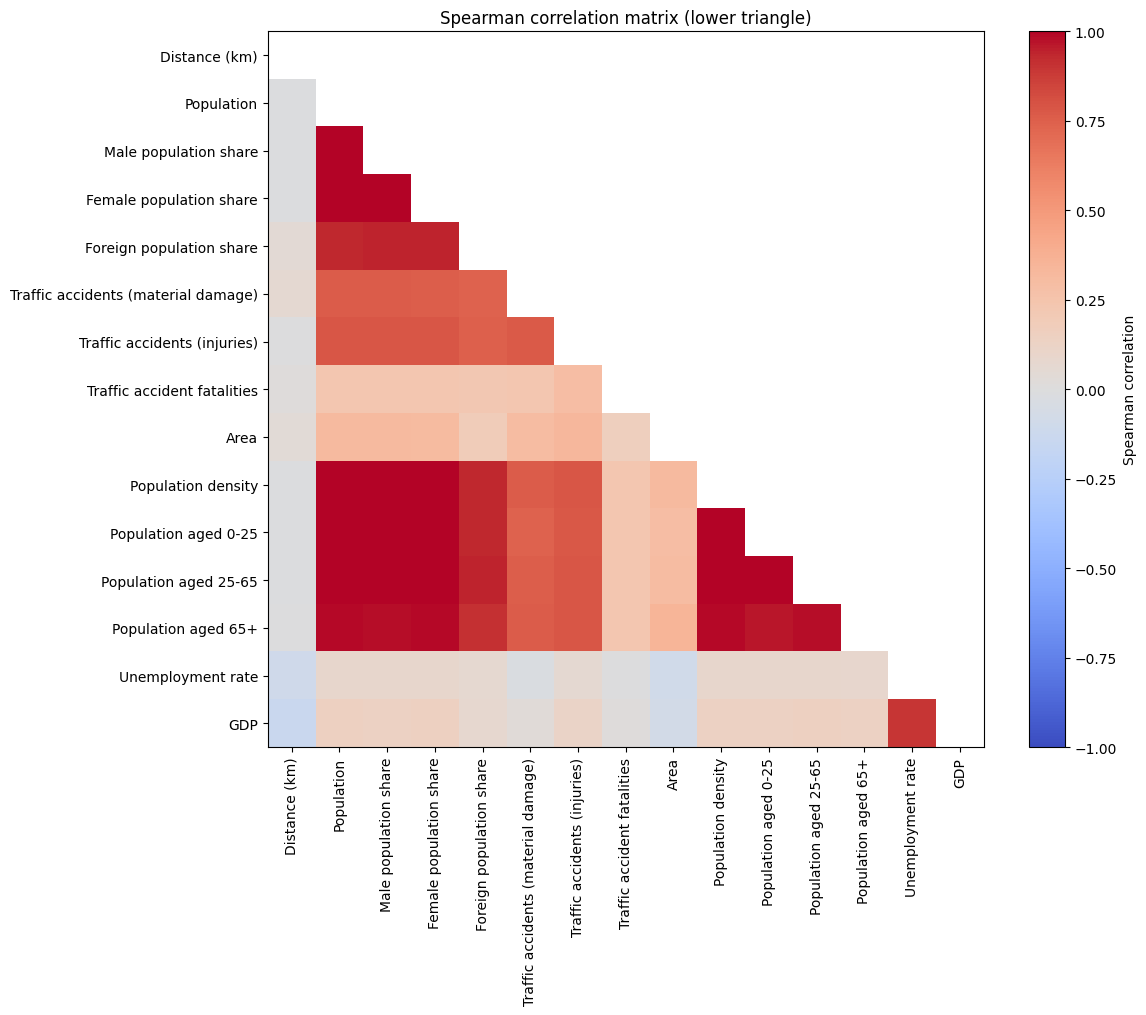

In [34]:
plot_feature_correlation_matrix(
    df_corr_matrix,
    label_map=label_map2,
    max_features=20,
    save_path="figures/feature_correlation_matrix.png"
)
